https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

https://www.cnn.com/2023/07/06/health/poor-sleep-exercise-brain-benefits-wellness/index.html

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from model_inspector import get_inspector
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
sleep = pd.read_csv('../datasets/Sleep_health_and_lifestyle_dataset.csv')

In [3]:
sleep.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75        10000           None  
2         125/80          75        10000           None  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [4]:
sleep.shape

(374, 13)

In [5]:
sleep.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [6]:
#Groupby functions for differences by groups

In [7]:
#Groupby by gender
sleep_gen=sleep.groupby('Gender').agg({
    'Age':'mean', 
    'Sleep Duration':'mean', 
    'Quality of Sleep':'mean',
    'Physical Activity Level':'mean',
    'Heart Rate':'mean',
    'Daily Steps':'mean'})

In [8]:
sleep_gen

Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
Gender                                                                         
Female  47.405405        7.229730          7.664865                59.140541   
Male    37.074074        7.036508          6.968254                59.201058   

        Heart Rate  Daily Steps  
Gender                           
Female   69.259459  6840.540541  
Male     71.052910  6793.650794

In [9]:
sleep.groupby('Gender').agg({
    'Age':['min', 'mean', 'max', 'count'], 
    'Sleep Duration':'mean', 
    'Quality of Sleep':'mean', 
    'Physical Activity Level':'mean',
    'Heart Rate':'mean',
    'Daily Steps':'mean'})

Age                      Sleep Duration Quality of Sleep  \
       min       mean max count           mean             mean   
Gender                                                            
Female  29  47.405405  59   185       7.229730         7.664865   
Male    27  37.074074  49   189       7.036508         6.968254   

       Physical Activity Level Heart Rate  Daily Steps  
                          mean       mean         mean  
Gender                                                  
Female               59.140541  69.259459  6840.540541  
Male                 59.201058  71.052910  6793.650794

In [106]:
sleep['Gender'].value_counts(normalize=True, dropna=False)

Male      0.505348
Female    0.494652
Name: Gender, dtype: float64

In [107]:
#Groupby by weight category

In [12]:
sleep_bmi=sleep.groupby('BMI Category').agg({
    'Age':'mean', 
    'Sleep Duration':'mean', 
    'Quality of Sleep':'mean',
    'Physical Activity Level':'mean',
    'Heart Rate':'mean',
    'Daily Steps':'mean'})

sleep_bmi

Age  Sleep Duration  Quality of Sleep  \
BMI Category                                                 
Normal         38.482051        7.393846          7.661538   
Normal Weight  38.380952        7.333333          7.428571   
Obese          38.000000        6.960000          6.400000   
Overweight     47.885135        6.770270          6.898649   

               Physical Activity Level  Heart Rate  Daily Steps  
BMI Category                                                     
Normal                       57.692308   68.728205  6887.179487  
Normal Weight                60.333333   71.285714  6766.666667  
Obese                        55.000000   84.300000  3350.000000  
Overweight                   61.236486   70.945946  6965.540541

#I will combine normal weight with normal and obese with overweight.

In [13]:
sleep_disorder=sleep.groupby('Sleep Disorder').agg({
    'Age':['mean', 'count'], 
    'Sleep Duration':'mean', 
    'Quality of Sleep':'mean', 
    'Physical Activity Level':'mean',
    'Heart Rate':'mean',
    'Daily Steps':'mean'})

sleep_disorder

Age       Sleep Duration Quality of Sleep  \
                     mean count           mean             mean   
Sleep Disorder                                                    
Insomnia        43.519481    77       6.589610         6.532468   
None            39.036530   219       7.358447         7.625571   
Sleep Apnea     49.705128    78       7.032051         7.205128   

               Physical Activity Level Heart Rate  Daily Steps  
                                  mean       mean         mean  
Sleep Disorder                                                  
Insomnia                     46.818182  70.467532  5901.298701  
None                         57.949772  69.018265  6852.968037  
Sleep Apnea                  74.794872  73.089744  7619.230769

correlation between sleep duration and stress, profession, weight, 
weight normal 0, overweight =1 

In [14]:
sleep.corr()

Person ID       Age  Sleep Duration  \
Person ID                 1.000000  0.990516        0.296305   
Age                       0.990516  1.000000        0.344709   
Sleep Duration            0.296305  0.344709        1.000000   
Quality of Sleep          0.431612  0.473734        0.883213   
Physical Activity Level   0.149882  0.178993        0.212360   
Stress Level             -0.394287 -0.422344       -0.811023   
Heart Rate               -0.225467 -0.225606       -0.516455   
Daily Steps               0.043844  0.057973       -0.039533   

                         Quality of Sleep  Physical Activity Level  \
Person ID                        0.431612                 0.149882   
Age                              0.473734                 0.178993   
Sleep Duration                   0.883213                 0.212360   
Quality of Sleep                 1.000000                 0.192896   
Physical Activity Level          0.192896                 1.000000   
Stress Level                    -0.898752                -0.034134   
Heart Rate                      -0.659865                 0.136971   
Daily Steps                      0.016791                 0.772723   

                         Stress Level  Heart Rate  Daily Steps  
Person ID                   -0.394287   -0.225467     0.043844  
Age                         -0.422344   -0.225606     0.057973  
Sleep Duration              -0.811023   -0.516455    -0.039533  
Quality of Sleep            -0.898752   -0.659865     0.016791  
Physical Activity Level     -0.034134    0.136971     0.772723  
Stress Level                 1.000000    0.670026     0.186829  
Heart Rate                   0.670026    1.000000    -0.030309  
Daily Steps                  0.186829   -0.030309     1.000000

There is a strong negative correlation between sleep duration and stress level and sleep duration and heart rate

In [15]:
sleep.Occupation.nunique()

11

In [16]:
sleep_occupation=sleep.groupby('Occupation').agg({
    'Age':['mean', 'count'], 
    'Sleep Duration':'mean', 
    'Quality of Sleep':'mean', 
    'Heart Rate':'mean',
    'Daily Steps':'mean'}).sort_values(by=('Sleep Duration', 'mean'), ascending=False)

sleep_occupation

Age       Sleep Duration Quality of Sleep  \
                           mean count           mean             mean   
Occupation                                                              
Engineer              46.587302    63       7.987302         8.412698   
Lawyer                39.425532    47       7.410638         7.893617   
Accountant            39.621622    37       7.113514         7.891892   
Nurse                 51.794521    73       7.063014         7.369863   
Doctor                32.676056    71       6.970423         6.647887   
Manager               45.000000     1       6.900000         7.000000   
Software Engineer     31.250000     4       6.750000         6.500000   
Teacher               41.725000    40       6.690000         6.975000   
Salesperson           43.531250    32       6.403125         6.000000   
Scientist             33.500000     4       6.000000         5.000000   
Sales Representative  28.000000     2       5.900000         4.000000   

                     Heart Rate  Daily Steps  
                           mean         mean  
Occupation                                    
Engineer              67.190476  5980.952381  
Lawyer                69.638298  7661.702128  
Accountant            68.864865  6881.081081  
Nurse                 72.000000  8057.534247  
Doctor                71.521127  6808.450704  
Manager               75.000000  5500.000000  
Software Engineer     75.500000  5800.000000  
Teacher               67.225000  5957.500000  
Salesperson           72.000000  6000.000000  
Scientist             78.500000  5350.000000  
Sales Representative  85.000000  3000.000000

In [17]:
sleep_occupation.columns

MultiIndex([(             'Age',  'mean'),
            (             'Age', 'count'),
            (  'Sleep Duration',  'mean'),
            ('Quality of Sleep',  'mean'),
            (      'Heart Rate',  'mean'),
            (     'Daily Steps',  'mean')],
           )

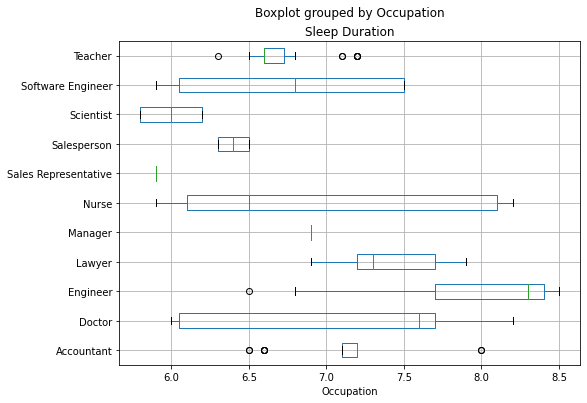

In [18]:
ax=sleep.boxplot(column='Sleep Duration', by='Occupation', figsize=(8, 6), rot=0, vert=False)

Working with data: transferring object data into numerical values

In [19]:
#Transferring weight data
keyword_mappings = {
    'Normal': 0,
    'Overweight': 1,
    'Obese': 1
}

def weight(row):
    for keyword, weight in keyword_mappings.items():
        if keyword in row['BMI Category']:
            return weight
    return None  

sleep['weight'] = sleep.apply(weight, axis=1)

In [20]:
#Dividing blood pressure data into two columns, one for systolic bp and the other for diastolic bp/ 
sleep[['bp_sys', 'bp_dia']] = sleep['Blood Pressure'].str.split('/', expand=True)

In [21]:
sleep["bp_sys"] = sleep.bp_sys.astype(int)
sleep['bp_dia'] = sleep.bp_dia.astype(int)

In [22]:
#Replacing sleep disorder data into numeric
keyword_mappings = {
    'None': 0,
    'Insomnia': 1,
    'Sleep Apnea': 2
}

def sleep_disorder(row):
    for keyword, disorder in keyword_mappings.items():
        if keyword in row['Sleep Disorder']:
            return disorder
    return None  

sleep['sleep_disorder'] = sleep.apply(sleep_disorder, axis=1)

In [23]:
#Replacing gender data into numeric
keyword_mappings = {
    'Male': 0,
    'Female': 1,
}

def gender(row):
    for keyword, gender in keyword_mappings.items():
        if keyword in row['Gender']:
            return gender
    return None  

sleep['gender'] = sleep.apply(gender, axis=1)

In [24]:
sleep.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  weight  bp_sys  \
0         126/83          77         4200           None       1     126   
1         125/80          75        10000           None       0     125   
2         125/80          75        10000           None       0     125   
3         140/90          85         3000    Sleep Apnea       1     140   
4         140/90          85         3000    Sleep Apnea       1     140   

   bp_dia  sleep_disorder  gender  
0      83               0       0  
1      80               0       0  
2      80               0       0  
3      90               2       0  
4      90               2       0

In [25]:
#Replacing occupation data with numer using get_dummies method
dummies = pd.get_dummies(sleep['Occupation'], prefix='x')

In [26]:
sleepd = pd.concat([sleep, dummies], axis=1)

In [27]:
sleepd.drop(columns=['BMI Category', 'Blood Pressure', 'Sleep Disorder', 'Gender', 'Occupation'], inplace=True)

In [28]:
sleepd.head()

Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0          1   27             6.1                 6                       42   
1          2   28             6.2                 6                       60   
2          3   28             6.2                 6                       60   
3          4   28             5.9                 4                       30   
4          5   28             5.9                 4                       30   

   Stress Level  Heart Rate  Daily Steps  weight  bp_sys  ...  x_Doctor  \
0             6          77         4200       1     126  ...         0   
1             8          75        10000       0     125  ...         1   
2             8          75        10000       0     125  ...         1   
3             8          85         3000       1     140  ...         0   
4             8          85         3000       1     140  ...         0   

   x_Engineer  x_Lawyer  x_Manager  x_Nurse  x_Sales Representative  \
0           0         0          0        0                       0   
1           0         0          0        0                       0   
2           0         0          0        0                       0   
3           0         0          0        0                       1   
4           0         0          0        0                       1   

   x_Salesperson  x_Scientist  x_Software Engineer  x_Teacher  
0              0            0                    1          0  
1              0            0                    0          0  
2              0            0                    0          0  
3              0            0                    0          0  
4              0            0                    0          0  

[5 rows x 24 columns]

In [29]:
sleepd.corr()

Person ID       Age  Sleep Duration  \
Person ID                 1.000000  0.990516        0.296305   
Age                       0.990516  1.000000        0.344709   
Sleep Duration            0.296305  0.344709        1.000000   
Quality of Sleep          0.431612  0.473734        0.883213   
Physical Activity Level   0.149882  0.178993        0.212360   
Stress Level             -0.394287 -0.422344       -0.811023   
Heart Rate               -0.225467 -0.225606       -0.516455   
Daily Steps               0.043844  0.057973       -0.039533   
weight                    0.518224  0.501122       -0.376518   
bp_sys                    0.611551  0.605878       -0.180406   
bp_dia                    0.590670  0.593839       -0.166570   
sleep_disorder            0.476492  0.487832       -0.239109   
gender                    0.584229  0.596358        0.121579   
x_Accountant             -0.105717 -0.098043       -0.007745   
x_Doctor                 -0.553474 -0.531401       -0.098486   
x_Engineer                0.243544  0.228784        0.484419   
x_Lawyer                 -0.118010 -0.120761        0.132904   
x_Manager                 0.036688  0.016831       -0.015123   
x_Nurse                   0.494225  0.546397       -0.042809   
x_Sales Representative   -0.124284 -0.120078       -0.113695   
x_Salesperson             0.087476  0.047562       -0.280622   
x_Scientist              -0.107862 -0.104251       -0.148137   
x_Software Engineer      -0.136031 -0.131260       -0.049997   
x_Teacher                 0.027486 -0.018359       -0.192539   

                         Quality of Sleep  Physical Activity Level  \
Person ID                        0.431612                 0.149882   
Age                              0.473734                 0.178993   
Sleep Duration                   0.883213                 0.212360   
Quality of Sleep                 1.000000                 0.192896   
Physical Activity Level          0.192896                 1.000000   
Stress Level                    -0.898752                -0.034134   
Heart Rate                      -0.659865                 0.136971   
Daily Steps                      0.016791                 0.772723   
weight                          -0.318928                 0.068685   
bp_sys                          -0.121632                 0.265416   
bp_dia                          -0.110151                 0.382651   
sleep_disorder                  -0.213003                 0.236560   
gender                           0.291366                -0.001454   
x_Accountant                     0.160513                -0.016932   
x_Doctor                        -0.269276                -0.088866   
x_Engineer                       0.414126                -0.158241   
x_Lawyer                         0.184201                 0.205104   
x_Manager                       -0.013551                -0.010382   
x_Nurse                          0.023495                 0.459681   
x_Sales Representative          -0.203211                -0.102819   
x_Salesperson                   -0.335950                -0.208373   
x_Scientist                     -0.201176                -0.090821   
x_Software Engineer             -0.070702                -0.055834   
x_Teacher                       -0.097806                -0.225345   

                         Stress Level  Heart Rate  Daily Steps    weight  \
Person ID                   -0.394287   -0.225467     0.043844  0.518224   
Age                         -0.422344   -0.225606     0.057973  0.501122   
Sleep Duration              -0.811023   -0.516455    -0.039533 -0.376518   
Quality of Sleep            -0.898752   -0.659865     0.016791 -0.318928   
Physical Activity Level     -0.034134    0.136971     0.772723  0.068685   
Stress Level                 1.000000    0.670026     0.186829  0.165451   
Heart Rate                   0.670026    1.000000    -0.030309  0.336579   
Daily Steps                  0.186829   -0.030309     1.000000 -0

<h4> Logistic Regression for weight<h4>

In [125]:
X = sleepd.drop(columns=["weight", "Person ID"])
y = sleepd.weight

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [127]:
lr = LogisticRegression(max_iter=1000)

In [128]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [129]:
lr.score(X_test, y_test)

0.9787234042553191

In [130]:
lr.score(X_train, y_train)

0.9785714285714285

In [131]:
null_model = DummyClassifier()
null_model.fit(X_train, y_train)

DummyClassifier()

In [132]:
null_model.score(X_test, y_test)

0.5957446808510638

In [133]:
y_test.value_counts(normalize=True)

0    0.595745
1    0.404255
Name: weight, dtype: float64

In [134]:
inspector = get_inspector(lr, X, y)
inspector.show_model()

For weight to change from normal to overweight, increase in age, in sleep disorders, 

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


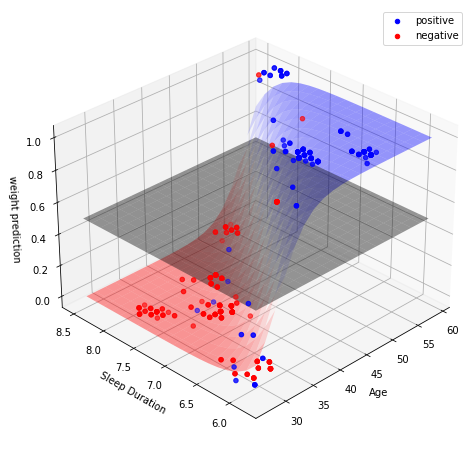

In [135]:
X = sleep[["Age", "Sleep Duration"]]
inspector = get_inspector(LogisticRegression().fit(X, y), X, y)
ax = inspector.plot3d()
ax.view_init(elev=30.0, azim=225)

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


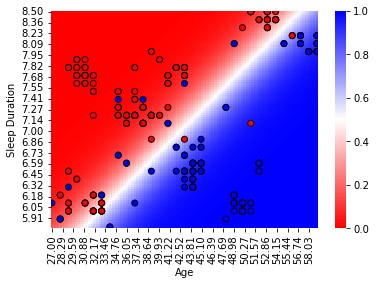

In [136]:
ax = inspector.plot()

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


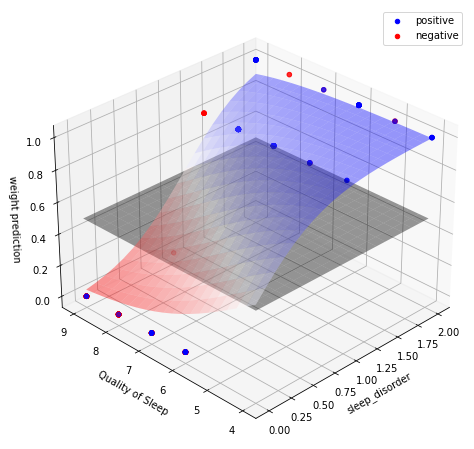

In [137]:
X = sleep[["sleep_disorder", "Quality of Sleep"]]
inspector = get_inspector(LogisticRegression().fit(X, y), X, y)
ax = inspector.plot3d()
ax.view_init(elev=30.0, azim=225)

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


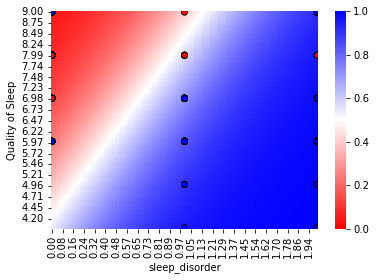

In [138]:
ax = inspector.plot()

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


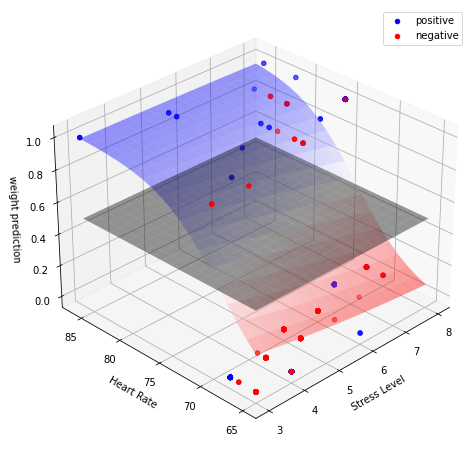

In [139]:
X = sleep[["Stress Level", "Heart Rate"]]
inspector = get_inspector(LogisticRegression().fit(X, y), X, y)
ax = inspector.plot3d()
ax.view_init(elev=30.0, azim=225)

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


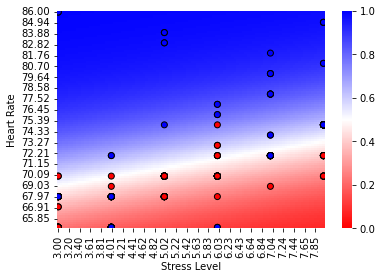

In [140]:
ax = inspector.plot()

C:\Users\ikhor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


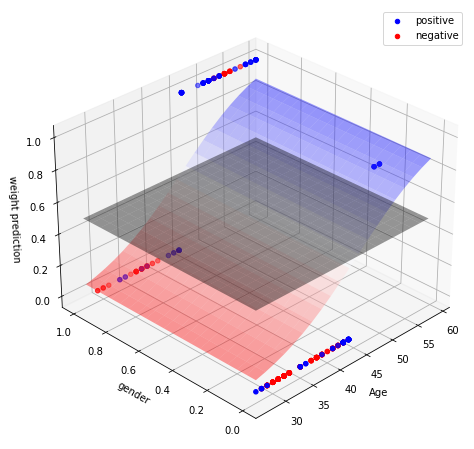

In [141]:
X = sleep[["Age", "gender"]]
inspector = get_inspector(LogisticRegression().fit(X, y), X, y)
ax = inspector.plot3d()
ax.view_init(elev=30.0, azim=225)

<h4> Linear Regression <h4>

In [142]:
X1 = sleepd.drop(columns=["Sleep Duration", "Person ID"])
y1 = sleepd['Sleep Duration']

In [143]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [144]:
lin=LinearRegression()

In [145]:
lin.fit(X1_train, y1_train)

LinearRegression()

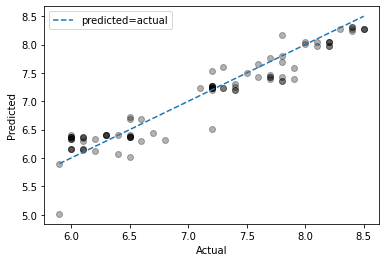

In [146]:
inspector = get_inspector(lin, X1_test, y1_test)
ax = inspector.plot_pred_vs_act()

(-5.0, 5.0)

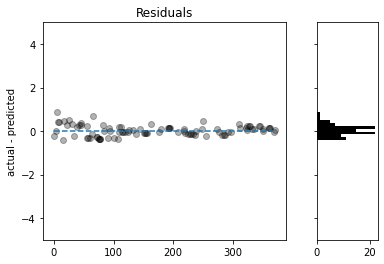

In [147]:
axes = inspector.plot_residuals()
axes[0].set_ylim([-5, 5])

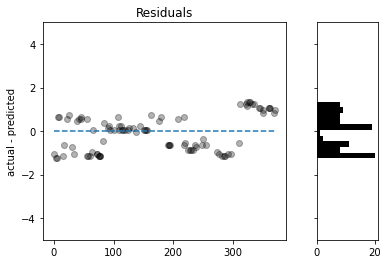

In [148]:
dummy_inspector = get_inspector(DummyRegressor().fit(X1_train, y1_train), X1_test, y1_test)
axes = dummy_inspector.plot_residuals()
axes[0].set_ylim([-5, 5]);

In [149]:
lin.score(X1_test, y1_test)

0.9092671374212291

In [150]:
inspector.show_model()

C:\Users\ikhor\anaconda3\lib\site-packages\waterfall_chart.py:66: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  trans.loc[net_label]= total


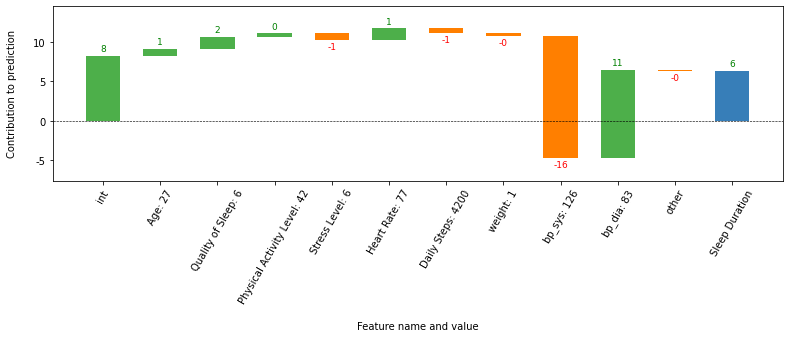

In [151]:
ax = inspector.plot_waterfall(
    X1.iloc[0],
    bar_num_formatter=".0f",
    tick_num_formatter=".0f",
    sorted_value=False,
    rotation_value=60,
    threshold=0.02,
)
ax.get_figure().set_size_inches((12, 6))

In [152]:
sleepd.head()

Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0          1   27             6.1                 6                       42   
1          2   28             6.2                 6                       60   
2          3   28             6.2                 6                       60   
3          4   28             5.9                 4                       30   
4          5   28             5.9                 4                       30   

   Stress Level  Heart Rate  Daily Steps  weight  bp_sys  ...  x_Doctor  \
0             6          77         4200       1     126  ...         0   
1             8          75        10000       0     125  ...         1   
2             8          75        10000       0     125  ...         1   
3             8          85         3000       1     140  ...         0   
4             8          85         3000       1     140  ...         0   

   x_Engineer  x_Lawyer  x_Manager  x_Nurse  x_Sales Representative  \
0           0         0          0        0                       0   
1           0         0          0        0                       0   
2           0         0          0        0                       0   
3           0         0          0        0                       1   
4           0         0          0        0                       1   

   x_Salesperson  x_Scientist  x_Software Engineer  x_Teacher  
0              0            0                    1          0  
1              0            0                    0          0  
2              0            0                    0          0  
3              0            0                    0          0  
4              0            0                    0          0  

[5 rows x 24 columns]

In [153]:
sleepd.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'weight', 'bp_sys', 'bp_dia', 'sleep_disorder', 'gender',
       'x_Accountant', 'x_Doctor', 'x_Engineer', 'x_Lawyer', 'x_Manager',
       'x_Nurse', 'x_Sales Representative', 'x_Salesperson', 'x_Scientist',
       'x_Software Engineer', 'x_Teacher'],
      dtype='object')

In [154]:
sleepd.groupby('gender').agg({
    'Age':'mean', 
    'Sleep Duration':'mean', 
    'Quality of Sleep':'mean', 
    'Physical Activity Level':'mean',
    'Stress Level':'mean',
    'Heart Rate':'mean',
    'weight':'mean',
    'bp_sys':'mean', 
    'bp_dia':'mean',
    'sleep_disorder':'mean'   
})

Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
gender                                                                         
0       37.074074        7.036508          6.968254                59.201058   
1       47.405405        7.229730          7.664865                59.140541   

        Stress Level  Heart Rate    weight      bp_sys     bp_dia  \
gender                                                              
0           6.079365   71.052910  0.269841  126.941799  83.015873   
1           4.675676   69.259459  0.578378  130.200000  86.318919   

        sleep_disorder  
gender                  
0             0.333333  
1             0.918919

In [155]:
sleepd.groupby('gender').agg({
    'x_Accountant':'sum',
    'x_Doctor':'sum', 
    'x_Engineer':'sum', 
    'x_Lawyer':'sum', 
    'x_Manager':'sum',
    'x_Nurse':'sum', 
    'x_Sales Representative':'sum', 
    'x_Salesperson':'sum', 
    'x_Scientist':'sum',
    'x_Software Engineer':'sum', 
    'x_Teacher':'sum'
})

x_Accountant  x_Doctor  x_Engineer  x_Lawyer  x_Manager  x_Nurse  \
gender                                                                     
0                  1        69          31        45          0        0   
1                 36         2          32         2          1       73   

        x_Sales Representative  x_Salesperson  x_Scientist  \
gender                                                       
0                            2             32            0   
1                            0              0            4   

        x_Software Engineer  x_Teacher  
gender                                  
0                         4          5  
1                         0         35

<h4>XGBoost for sleep duration and feature importances<h4>

In [156]:
#Removing spaces between words in column names. 
sleepd.columns=sleepd.columns.str.replace(' ', '_')

In [157]:
sleepd.head()

Person_ID  Age  Sleep_Duration  Quality_of_Sleep  Physical_Activity_Level  \
0          1   27             6.1                 6                       42   
1          2   28             6.2                 6                       60   
2          3   28             6.2                 6                       60   
3          4   28             5.9                 4                       30   
4          5   28             5.9                 4                       30   

   Stress_Level  Heart_Rate  Daily_Steps  weight  bp_sys  ...  x_Doctor  \
0             6          77         4200       1     126  ...         0   
1             8          75        10000       0     125  ...         1   
2             8          75        10000       0     125  ...         1   
3             8          85         3000       1     140  ...         0   
4             8          85         3000       1     140  ...         0   

   x_Engineer  x_Lawyer  x_Manager  x_Nurse  x_Sales_Representative  \
0           0         0          0        0                       0   
1           0         0          0        0                       0   
2           0         0          0        0                       0   
3           0         0          0        0                       1   
4           0         0          0        0                       1   

   x_Salesperson  x_Scientist  x_Software_Engineer  x_Teacher  
0              0            0                    1          0  
1              0            0                    0          0  
2              0            0                    0          0  
3              0            0                    0          0  
4              0            0                    0          0  

[5 rows x 24 columns]

In [158]:
#Combining 'Sales Represetantives' and 'Salespeople' into one category of 'Sales'
sleepd['Sales']=sleepd['x_Sales_Representative']+sleepd['x_Salesperson']

In [159]:
sleepd.drop(columns=['x_Sales_Representative', 'x_Salesperson'], inplace=True)

In [160]:
xgb_model=xgb.XGBRegressor()

In [161]:
X1 = sleepd.drop(columns=["Sleep_Duration", "Person_ID", "Quality_of_Sleep"])
y1 = sleepd['Sleep_Duration']

In [162]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [163]:
xgb_model.fit(X1_train, y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [164]:
xgb_model.score(X1_train, y1_train)

0.9961838210933712

In [165]:
xgb_model.score(X1_test, y1_test)

0.9825973008642213

In [166]:
sleep_feat=pd.DataFrame(xgb_model.feature_importances_, X1_train.columns)
sleep_feat.columns=['importance']
sleep_feat=sleep_feat.sort_values(by='importance', ascending=False).reset_index(drop=False)
sleep_feat['cumulative_importance']=sleep_feat['importance'].cumsum()
sleep_feat

index  importance  cumulative_importance
0              Stress_Level    0.826520               0.826520
1                x_Engineer    0.071868               0.898388
2   Physical_Activity_Level    0.038765               0.937153
3               x_Scientist    0.022832               0.959985
4               Daily_Steps    0.008805               0.968790
5                       Age    0.005321               0.974112
6                    bp_sys    0.004916               0.979028
7                Heart_Rate    0.004153               0.983180
8                 x_Teacher    0.003852               0.987032
9                  x_Doctor    0.002924               0.989956
10                   weight    0.002741               0.992698
11      x_Software_Engineer    0.002684               0.995382
12                x_Manager    0.001181               0.996563
13                  x_Nurse    0.000880               0.997443
14                   bp_dia    0.000814               0.998257
15                   gender    0.000754               0.999011
16           sleep_disorder    0.000350               0.999361
17             x_Accountant    0.000270               0.999631
18                 x_Lawyer    0.000220               0.999851
19                    Sales    0.000149               1.000000

Sleep Duration = 8.18 + 0.03 * Age + 0.27 * Quality of Sleep + 0.01 * Physical Activity Level - 0.13 * Stress Level + 0.02 * Heart Rate - 0.00 * Daily Steps - 0.36 * weight - 0.12 * bp_sys + 0.13 * bp_dia + 0.01 * sleep_disorder - 0.05 * gender - 0.54 * x_Accountant + 0.24 * x_Doctor + 0.19 * x_Engineer + 0.15 * x_Lawyer - 0.38 * x_Manager - 0.28 * x_Nurse + 0.80 * x_Sales Representative + 0.07 * x_Salesperson + 0.02 * x_Scientist - 0.08 * x_Software Engineer - 0.20 * x_Teacher

<h4> XGBoost Classifier for weight<h4>

In [91]:
X = sleepd.drop(columns=["weight", "Person_ID"])
y = sleepd.weight

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [93]:
xgb_weight=xgb.XGBClassifier()

In [94]:
xgb_weight.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [95]:
xgb_weight.score(X_test, y_test)

1.0

In [96]:
xgb_weight.score(X_train, y_train)

1.0

In [97]:
weight_feat=pd.DataFrame(xgb_weight.feature_importances_, X_train.columns)
weight_feat.columns=['importance']
weight_feat=weight_feat.sort_values(by='importance', ascending=False).reset_index(drop=False)
weight_feat['cumulative_importance']=weight_feat['importance'].cumsum()
weight_feat

index  importance  cumulative_importance
0            sleep_disorder    0.715429               0.715429
1                    bp_dia    0.098095               0.813524
2                x_Engineer    0.069768               0.883292
3                    bp_sys    0.047547               0.930839
4               Daily_Steps    0.028454               0.959294
5                Heart_Rate    0.010922               0.970216
6                 Person_ID    0.007744               0.977960
7            Sleep_Duration    0.006191               0.984151
8                    gender    0.005362               0.989514
9                 x_Teacher    0.004836               0.994349
10                  x_Nurse    0.002616               0.996966
11  Physical_Activity_Level    0.001498               0.998464
12         Quality_of_Sleep    0.001112               0.999576
13             Stress_Level    0.000424               1.000000
14                      Age    0.000000               1.000000
15             x_Accountant    0.000000               1.000000
16                 x_Doctor    0.000000               1.000000
17                 x_Lawyer    0.000000               1.000000
18                x_Manager    0.000000               1.000000
19              x_Scientist    0.000000               1.000000
20      x_Software_Engineer    0.000000               1.000000
21                    Sales    0.000000               1.000000

log-odds(weight) = -0.08 + 0.36 * Age - 1.78 * Sleep Duration - 1.14 * Quality of Sleep + 0.04 * Physical Activity Level - 0.22 * Stress Level - 0.02 * Heart Rate - 0.00 * Daily Steps - 0.77 * bp_sys + 1.36 * bp_dia + 0.39 * sleep_disorder - 1.39 * gender + 0.06 * x_Accountant - 0.50 * x_Doctor - 0.44 * x_Engineer - 0.12 * x_Lawyer + 0.20 * x_Manager - 1.35 * x_Nurse + 0.03 * x_Sales Representative + 0.57 * x_Salesperson + 0.55 * x_Scientist - 0.00 * x_Software Engineer + 0.98 * x_Teacher